In [1]:
import os
import tensorflow as tf
from tensorflow.contrib.tensorboard.plugins import projector
import numpy as np
import pickle

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = os.getcwd()
LOG_DIR = PATH + '/tmp/log-2'
metadata = os.path.join(LOG_DIR, 'metadata.tsv')

### Loading of the data

In [3]:
path = './cifar-10-batches-py/test_batch'
f = open(path, 'rb')
data = pickle.load(f, encoding='bytes')
imgs = data[b'data']
imgs = np.transpose(np.reshape(imgs,(-1,32,32,3), order='F'),axes=(0,2,1,3)) #order batch,x,y,color
y = np.asarray(data[b'labels'], dtype='uint8')
y.shape, imgs.shape

((10000,), (10000, 32, 32, 3))

### Creation of the meta data (labels)

In [4]:
N = y.shape[0]
#N = 1000

In [5]:
names = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

metadata_file = open(os.path.join(LOG_DIR, 'metadata.tsv'), 'w')
#metadata_file.write('Name\tClass\n')

for i in range(N):
    metadata_file.write('%s\n' % names[y[i]])

metadata_file.close()

car


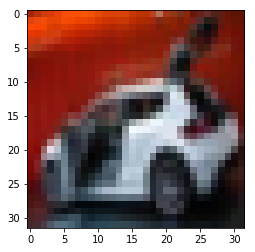

In [6]:
i = 6
print(names[y[i]])
plt.imshow(imgs[i]);

In [7]:
images = tf.Variable(data[b'data'][:N].astype(np.float32), name='images')

In [8]:
with tf.Session() as sess:
    saver = tf.train.Saver([images])

    sess.run(images.initializer)
    saver.save(sess, os.path.join(LOG_DIR, 'images.ckpt'))

    config = projector.ProjectorConfig()
    
    # One can add multiple embeddings.
    embedding = config.embeddings.add()
    embedding.tensor_name = images.name
    
    # Link this tensor to its metadata file (e.g. labels).
    embedding.metadata_path = metadata
    
    # Saves a config file that TensorBoard will read during startup.
    projector.visualize_embeddings(tf.summary.FileWriter(LOG_DIR), config)

In [9]:
data[b'data'][:N].astype(np.float32).shape

(10000, 3072)